# Introduction to Convolutional Neural Networks

CSC/DSC 340 Week 10 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023

## Introduction and Termoinology

* This week we will cover convolutional neural networks (CNNs)
    * Image analysis, video analysis, object detection
* Note that we will not be going through any mathematics this week as the mathematics of CNNs is quite complicated but there are many good resources (including your textbook) if you are interested

* Convolution refers to the mathematical combination of two functions to produce a third function
    * It merges two sets of information
    * The convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

![CNNs](https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t)

[Image Source](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

## Introduction to the MNIST Data Set
* Photos (28 pixels by 28 pixels) of handwritten numeric digits as the input
* Number shown in the photo as an output
* Challenges: 2D data structure (images), variations in handwriting, low quality images, size of data set (60,000 images in the training set, 10,000 in the test set)

### Import With Tensorflow
* Also avaliable through Scikit-Learn, but does not come automatically split into a training and test set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


* Let's display some of the images

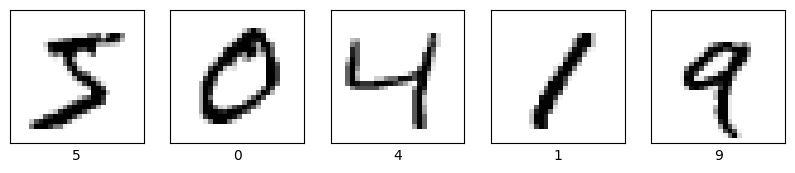

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* 60k is a lot of images to have in a training set (though may be needed for large neural networks)
* Let's randomly select 5k images to use for training instead of 60k so networks train faster
* Can use a smaller data set in the construction of your neural network (hyperparameter tuning process) but then use a larger sample to train the final network

In [3]:
import numpy as np
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

* Classification can suffer from class imbalances. Let's make sure our data is relatively evenly distributed.

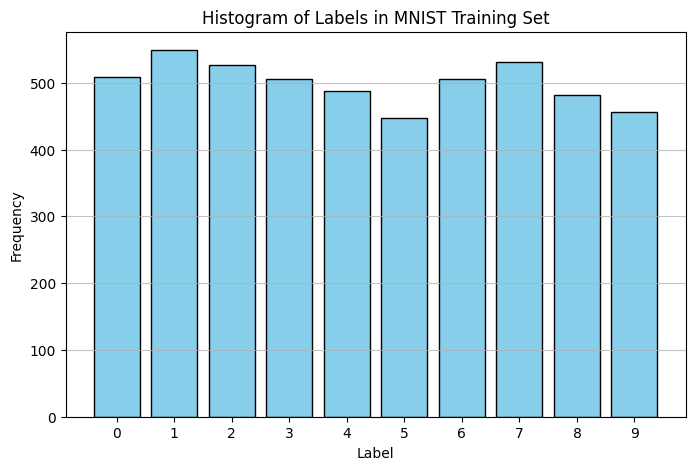

In [4]:
# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Classification with a Regular Neural Network
* We can clasify the MNIST data with a regular neural network, but due to its architecture we have to flatten the data before it can reach the dense layers
* Neural networks can be used to successfully classify images, but flattening the images can remove important patterns

* Create a model that flattens the data (28x28 pixel images). We then have one hidden layer with 128 neurons and a Relu activation function, and an output layer with 10 neurons (10 possible outputs) and a softmax activation function since this is a classification.

In [5]:
from tensorflow.keras import layers, models
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* For compiling the model we will use the Adam optimizer, our metric of success will be accuracy, and our loss function is sparse categorical cross-entropy
    * Sparse categorical cross-entropy is similiar to categorical cross-entropy but while categorical cross-entropy requires the data to be one-hot encoded prior to training the model, sparse categorical cross-entropy does not

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Train the model and the determine the accuracy

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


   1/1875 [..............................] - ETA: 5:19 - loss: 2.3623 - accuracy: 0.0938

  33/1875 [..............................] - ETA: 3s - loss: 1.4794 - accuracy: 0.5890  

  62/1875 [..............................] - ETA: 3s - loss: 1.1165 - accuracy: 0.6941

  93/1875 [>.............................] - ETA: 2s - loss: 0.9199 - accuracy: 0.7460

 124/1875 [>.............................] - ETA: 2s - loss: 0.8016 - accuracy: 0.7797

 156/1875 [=>............................] - ETA: 2s - loss: 0.7194 - accuracy: 0.8019

 189/1875 [==>...........................] - ETA: 2s - loss: 0.6570 - accuracy: 0.8206

 218/1875 [==>...........................] - ETA: 2s - loss: 0.6171 - accuracy: 0.8301

 248/1875 [==>...........................] - ETA: 2s - loss: 0.5778 - accuracy: 0.8395

 277/1875 [===>..........................] - ETA: 2s - loss: 0.5596 - accuracy: 0.8445

 309/1875 [===>..........................] - ETA: 2s - loss: 0.5312 - accuracy: 0.8513

 339/1875 [====>.........................] - ETA: 2s - loss: 0.5104 - accuracy: 0.8569

 382/1875 [=====>........................] - ETA: 2s - loss: 0.4867 - accuracy: 0.8641

 420/1875 [=====>........................] - ETA: 2s - loss: 0.4674 - accuracy: 0.8691

 452/1875 [======>.......................] - ETA: 2s - loss: 0.4518 - accuracy: 0.8730

 496/1875 [======>.......................] - ETA: 2s - loss: 0.4370 - accuracy: 0.8766

 539/1875 [=======>......................] - ETA: 2s - loss: 0.4219 - accuracy: 0.8810

 576/1875 [========>.....................] - ETA: 1s - loss: 0.4118 - accuracy: 0.8835

 616/1875 [========>.....................] - ETA: 1s - loss: 0.4006 - accuracy: 0.8868

 651/1875 [=========>....................] - ETA: 1s - loss: 0.3913 - accuracy: 0.8895

 671/1875 [=========>....................] - ETA: 1s - loss: 0.3867 - accuracy: 0.8912

 698/1875 [==========>...................] - ETA: 1s - loss: 0.3794 - accuracy: 0.8930

 728/1875 [==========>...................] - ETA: 1s - loss: 0.3731 - accuracy: 0.8948

 758/1875 [===========>..................] - ETA: 1s - loss: 0.3667 - accuracy: 0.8964

 784/1875 [===========>..................] - ETA: 1s - loss: 0.3626 - accuracy: 0.8975

 810/1875 [===========>..................] - ETA: 1s - loss: 0.3593 - accuracy: 0.8985

 834/1875 [============>.................] - ETA: 1s - loss: 0.3548 - accuracy: 0.8999

 849/1875 [============>.................] - ETA: 1s - loss: 0.3521 - accuracy: 0.9005

 863/1875 [============>.................] - ETA: 1s - loss: 0.3496 - accuracy: 0.9011

 888/1875 [=============>................] - ETA: 1s - loss: 0.3465 - accuracy: 0.9017

 910/1875 [=============>................] - ETA: 1s - loss: 0.3429 - accuracy: 0.9025

 923/1875 [=============>................] - ETA: 1s - loss: 0.3411 - accuracy: 0.9030

 943/1875 [==============>...............] - ETA: 1s - loss: 0.3382 - accuracy: 0.9037

 972/1875 [==============>...............] - ETA: 1s - loss: 0.3326 - accuracy: 0.9053

1004/1875 [===============>..............] - ETA: 1s - loss: 0.3287 - accuracy: 0.9063

1037/1875 [===============>..............] - ETA: 1s - loss: 0.3243 - accuracy: 0.9077

1049/1875 [===============>..............] - ETA: 1s - loss: 0.3230 - accuracy: 0.9082

1066/1875 [================>.............] - ETA: 1s - loss: 0.3204 - accuracy: 0.9088

1086/1875 [================>.............] - ETA: 1s - loss: 0.3185 - accuracy: 0.9096

1109/1875 [================>.............] - ETA: 1s - loss: 0.3154 - accuracy: 0.9106

1132/1875 [=================>............] - ETA: 1s - loss: 0.3128 - accuracy: 0.9113

1165/1875 [=================>............] - ETA: 1s - loss: 0.3096 - accuracy: 0.9121

1209/1875 [==================>...........] - ETA: 1s - loss: 0.3043 - accuracy: 0.9135

1237/1875 [==================>...........] - ETA: 1s - loss: 0.3014 - accuracy: 0.9141

1256/1875 [===================>..........] - ETA: 1s - loss: 0.2993 - accuracy: 0.9146

1282/1875 [===================>..........] - ETA: 1s - loss: 0.2974 - accuracy: 0.9154

1305/1875 [===================>..........] - ETA: 1s - loss: 0.2947 - accuracy: 0.9162

1330/1875 [====================>.........] - ETA: 0s - loss: 0.2924 - accuracy: 0.9169

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2910 - accuracy: 0.9172

1374/1875 [====================>.........] - ETA: 0s - loss: 0.2895 - accuracy: 0.9176

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2869 - accuracy: 0.9182

1467/1875 [======================>.......] - ETA: 0s - loss: 0.2829 - accuracy: 0.9191

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2792 - accuracy: 0.9203

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2776 - accuracy: 0.9207

1557/1875 [=======================>......] - ETA: 0s - loss: 0.2771 - accuracy: 0.9208

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2742 - accuracy: 0.9216

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2720 - accuracy: 0.9224

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2704 - accuracy: 0.9229

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2692 - accuracy: 0.9231

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2674 - accuracy: 0.9236

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2648 - accuracy: 0.9243

1742/1875 [==========================>...] - ETA: 0s - loss: 0.2632 - accuracy: 0.9248

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2617 - accuracy: 0.9253

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2596 - accuracy: 0.9260

1810/1875 [===========================>..] - ETA: 0s - loss: 0.2588 - accuracy: 0.9262

1848/1875 [============================>.] - ETA: 0s - loss: 0.2566 - accuracy: 0.9267

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9272


Epoch 2/5


   1/1875 [..............................] - ETA: 4s - loss: 0.2103 - accuracy: 0.9688

  25/1875 [..............................] - ETA: 3s - loss: 0.1340 - accuracy: 0.9625

  43/1875 [..............................] - ETA: 4s - loss: 0.1218 - accuracy: 0.9644

  59/1875 [..............................] - ETA: 4s - loss: 0.1234 - accuracy: 0.9635

  75/1875 [>.............................] - ETA: 5s - loss: 0.1205 - accuracy: 0.9658

  90/1875 [>.............................] - ETA: 5s - loss: 0.1181 - accuracy: 0.9667

 112/1875 [>.............................] - ETA: 4s - loss: 0.1172 - accuracy: 0.9662

 139/1875 [=>............................] - ETA: 4s - loss: 0.1270 - accuracy: 0.9627

 163/1875 [=>............................] - ETA: 4s - loss: 0.1291 - accuracy: 0.9617

 178/1875 [=>............................] - ETA: 4s - loss: 0.1276 - accuracy: 0.9623

 192/1875 [==>...........................] - ETA: 4s - loss: 0.1293 - accuracy: 0.9611

 213/1875 [==>...........................] - ETA: 4s - loss: 0.1315 - accuracy: 0.9614

 233/1875 [==>...........................] - ETA: 4s - loss: 0.1336 - accuracy: 0.9608

 258/1875 [===>..........................] - ETA: 4s - loss: 0.1289 - accuracy: 0.9625

 297/1875 [===>..........................] - ETA: 3s - loss: 0.1236 - accuracy: 0.9649

 336/1875 [====>.........................] - ETA: 3s - loss: 0.1211 - accuracy: 0.9655

 355/1875 [====>.........................] - ETA: 3s - loss: 0.1203 - accuracy: 0.9660

 370/1875 [====>.........................] - ETA: 3s - loss: 0.1209 - accuracy: 0.9655

 382/1875 [=====>........................] - ETA: 3s - loss: 0.1204 - accuracy: 0.9656

 409/1875 [=====>........................] - ETA: 3s - loss: 0.1200 - accuracy: 0.9658

 421/1875 [=====>........................] - ETA: 3s - loss: 0.1195 - accuracy: 0.9661

 443/1875 [======>.......................] - ETA: 3s - loss: 0.1206 - accuracy: 0.9658

 469/1875 [======>.......................] - ETA: 3s - loss: 0.1215 - accuracy: 0.9652

 482/1875 [======>.......................] - ETA: 3s - loss: 0.1209 - accuracy: 0.9651

 490/1875 [======>.......................] - ETA: 3s - loss: 0.1208 - accuracy: 0.9651

 498/1875 [======>.......................] - ETA: 3s - loss: 0.1201 - accuracy: 0.9652

 513/1875 [=======>......................] - ETA: 3s - loss: 0.1206 - accuracy: 0.9650

 525/1875 [=======>......................] - ETA: 3s - loss: 0.1212 - accuracy: 0.9648

 539/1875 [=======>......................] - ETA: 3s - loss: 0.1214 - accuracy: 0.9645

 556/1875 [=======>......................] - ETA: 3s - loss: 0.1204 - accuracy: 0.9646

 584/1875 [========>.....................] - ETA: 3s - loss: 0.1190 - accuracy: 0.9651

 622/1875 [========>.....................] - ETA: 3s - loss: 0.1196 - accuracy: 0.9652

 656/1875 [=========>....................] - ETA: 3s - loss: 0.1202 - accuracy: 0.9652

 681/1875 [=========>....................] - ETA: 2s - loss: 0.1192 - accuracy: 0.9654

 705/1875 [==========>...................] - ETA: 2s - loss: 0.1195 - accuracy: 0.9652

 744/1875 [==========>...................] - ETA: 2s - loss: 0.1203 - accuracy: 0.9648

 787/1875 [===========>..................] - ETA: 2s - loss: 0.1197 - accuracy: 0.9652

 831/1875 [============>.................] - ETA: 2s - loss: 0.1200 - accuracy: 0.9648

 859/1875 [============>.................] - ETA: 2s - loss: 0.1189 - accuracy: 0.9650

 882/1875 [=============>................] - ETA: 2s - loss: 0.1186 - accuracy: 0.9652

 900/1875 [=============>................] - ETA: 2s - loss: 0.1188 - accuracy: 0.9652

 933/1875 [=============>................] - ETA: 2s - loss: 0.1187 - accuracy: 0.9653

 961/1875 [==============>...............] - ETA: 2s - loss: 0.1189 - accuracy: 0.9653

 988/1875 [==============>...............] - ETA: 1s - loss: 0.1188 - accuracy: 0.9655

1020/1875 [===============>..............] - ETA: 1s - loss: 0.1184 - accuracy: 0.9658

1046/1875 [===============>..............] - ETA: 1s - loss: 0.1182 - accuracy: 0.9661

1069/1875 [================>.............] - ETA: 1s - loss: 0.1179 - accuracy: 0.9661

1088/1875 [================>.............] - ETA: 1s - loss: 0.1172 - accuracy: 0.9663

1111/1875 [================>.............] - ETA: 1s - loss: 0.1165 - accuracy: 0.9663

1137/1875 [=================>............] - ETA: 1s - loss: 0.1168 - accuracy: 0.9662

1170/1875 [=================>............] - ETA: 1s - loss: 0.1167 - accuracy: 0.9661

1202/1875 [==================>...........] - ETA: 1s - loss: 0.1165 - accuracy: 0.9662

1224/1875 [==================>...........] - ETA: 1s - loss: 0.1163 - accuracy: 0.9662

1242/1875 [==================>...........] - ETA: 1s - loss: 0.1161 - accuracy: 0.9663

1261/1875 [===================>..........] - ETA: 1s - loss: 0.1157 - accuracy: 0.9663

1287/1875 [===================>..........] - ETA: 1s - loss: 0.1159 - accuracy: 0.9664

1313/1875 [====================>.........] - ETA: 1s - loss: 0.1163 - accuracy: 0.9663

1332/1875 [====================>.........] - ETA: 1s - loss: 0.1163 - accuracy: 0.9662

1358/1875 [====================>.........] - ETA: 1s - loss: 0.1161 - accuracy: 0.9663

1385/1875 [=====================>........] - ETA: 1s - loss: 0.1155 - accuracy: 0.9664

1405/1875 [=====================>........] - ETA: 1s - loss: 0.1155 - accuracy: 0.9665

1426/1875 [=====================>........] - ETA: 0s - loss: 0.1155 - accuracy: 0.9665

1461/1875 [======================>.......] - ETA: 0s - loss: 0.1153 - accuracy: 0.9664

1504/1875 [=======================>......] - ETA: 0s - loss: 0.1154 - accuracy: 0.9663

1546/1875 [=======================>......] - ETA: 0s - loss: 0.1148 - accuracy: 0.9665

1597/1875 [========================>.....] - ETA: 0s - loss: 0.1137 - accuracy: 0.9669

1646/1875 [=========================>....] - ETA: 0s - loss: 0.1139 - accuracy: 0.9669

1683/1875 [=========================>....] - ETA: 0s - loss: 0.1131 - accuracy: 0.9672

1718/1875 [==========================>...] - ETA: 0s - loss: 0.1128 - accuracy: 0.9674

1751/1875 [===========================>..] - ETA: 0s - loss: 0.1126 - accuracy: 0.9675

1796/1875 [===========================>..] - ETA: 0s - loss: 0.1121 - accuracy: 0.9675

1842/1875 [============================>.] - ETA: 0s - loss: 0.1116 - accuracy: 0.9677

1869/1875 [============================>.] - ETA: 0s - loss: 0.1119 - accuracy: 0.9677

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1119 - accuracy: 0.9677


Epoch 3/5


   1/1875 [..............................] - ETA: 8s - loss: 0.0696 - accuracy: 1.0000

  22/1875 [..............................] - ETA: 4s - loss: 0.0747 - accuracy: 0.9801

  40/1875 [..............................] - ETA: 4s - loss: 0.0680 - accuracy: 0.9805

  62/1875 [..............................] - ETA: 4s - loss: 0.0753 - accuracy: 0.9803

  84/1875 [>.............................] - ETA: 4s - loss: 0.0736 - accuracy: 0.9788

 105/1875 [>.............................] - ETA: 4s - loss: 0.0724 - accuracy: 0.9789

 126/1875 [=>............................] - ETA: 4s - loss: 0.0703 - accuracy: 0.9797

 147/1875 [=>............................] - ETA: 4s - loss: 0.0721 - accuracy: 0.9785

 167/1875 [=>............................] - ETA: 4s - loss: 0.0738 - accuracy: 0.9779

 196/1875 [==>...........................] - ETA: 4s - loss: 0.0786 - accuracy: 0.9780

 227/1875 [==>...........................] - ETA: 3s - loss: 0.0776 - accuracy: 0.9780

 257/1875 [===>..........................] - ETA: 3s - loss: 0.0807 - accuracy: 0.9762

 293/1875 [===>..........................] - ETA: 3s - loss: 0.0795 - accuracy: 0.9767

 328/1875 [====>.........................] - ETA: 3s - loss: 0.0790 - accuracy: 0.9767

 368/1875 [====>.........................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9768

 408/1875 [=====>........................] - ETA: 2s - loss: 0.0783 - accuracy: 0.9774

 444/1875 [======>.......................] - ETA: 2s - loss: 0.0778 - accuracy: 0.9774

 473/1875 [======>.......................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9769

 510/1875 [=======>......................] - ETA: 2s - loss: 0.0799 - accuracy: 0.9763

 537/1875 [=======>......................] - ETA: 2s - loss: 0.0793 - accuracy: 0.9767

 560/1875 [=======>......................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9768

 583/1875 [========>.....................] - ETA: 2s - loss: 0.0801 - accuracy: 0.9767

 608/1875 [========>.....................] - ETA: 2s - loss: 0.0801 - accuracy: 0.9767

 635/1875 [=========>....................] - ETA: 2s - loss: 0.0800 - accuracy: 0.9765

 665/1875 [=========>....................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9766

 692/1875 [==========>...................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9764

 723/1875 [==========>...................] - ETA: 2s - loss: 0.0796 - accuracy: 0.9764

 753/1875 [===========>..................] - ETA: 2s - loss: 0.0802 - accuracy: 0.9763

 780/1875 [===========>..................] - ETA: 2s - loss: 0.0807 - accuracy: 0.9760

 811/1875 [===========>..................] - ETA: 1s - loss: 0.0801 - accuracy: 0.9764

 841/1875 [============>.................] - ETA: 1s - loss: 0.0804 - accuracy: 0.9763

 862/1875 [============>.................] - ETA: 1s - loss: 0.0803 - accuracy: 0.9761

 880/1875 [=============>................] - ETA: 1s - loss: 0.0801 - accuracy: 0.9763

 900/1875 [=============>................] - ETA: 1s - loss: 0.0799 - accuracy: 0.9763

 905/1875 [=============>................] - ETA: 1s - loss: 0.0804 - accuracy: 0.9762

 916/1875 [=============>................] - ETA: 1s - loss: 0.0804 - accuracy: 0.9763

 924/1875 [=============>................] - ETA: 1s - loss: 0.0801 - accuracy: 0.9764

 961/1875 [==============>...............] - ETA: 1s - loss: 0.0804 - accuracy: 0.9763

 975/1875 [==============>...............] - ETA: 1s - loss: 0.0805 - accuracy: 0.9762

 994/1875 [==============>...............] - ETA: 1s - loss: 0.0803 - accuracy: 0.9762

1016/1875 [===============>..............] - ETA: 1s - loss: 0.0802 - accuracy: 0.9761

1041/1875 [===============>..............] - ETA: 1s - loss: 0.0803 - accuracy: 0.9760

1065/1875 [================>.............] - ETA: 1s - loss: 0.0805 - accuracy: 0.9759

1084/1875 [================>.............] - ETA: 1s - loss: 0.0801 - accuracy: 0.9760

1109/1875 [================>.............] - ETA: 1s - loss: 0.0803 - accuracy: 0.9759

1131/1875 [=================>............] - ETA: 1s - loss: 0.0805 - accuracy: 0.9759

1151/1875 [=================>............] - ETA: 1s - loss: 0.0804 - accuracy: 0.9760

1175/1875 [=================>............] - ETA: 1s - loss: 0.0801 - accuracy: 0.9760

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0799 - accuracy: 0.9760

1222/1875 [==================>...........] - ETA: 1s - loss: 0.0797 - accuracy: 0.9760

1252/1875 [===================>..........] - ETA: 1s - loss: 0.0793 - accuracy: 0.9762

1282/1875 [===================>..........] - ETA: 1s - loss: 0.0793 - accuracy: 0.9762

1312/1875 [===================>..........] - ETA: 1s - loss: 0.0789 - accuracy: 0.9763

1347/1875 [====================>.........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9762

1373/1875 [====================>.........] - ETA: 1s - loss: 0.0791 - accuracy: 0.9763

1404/1875 [=====================>........] - ETA: 0s - loss: 0.0786 - accuracy: 0.9765

1429/1875 [=====================>........] - ETA: 0s - loss: 0.0787 - accuracy: 0.9766

1458/1875 [======================>.......] - ETA: 0s - loss: 0.0787 - accuracy: 0.9766

1486/1875 [======================>.......] - ETA: 0s - loss: 0.0789 - accuracy: 0.9766

1517/1875 [=======================>......] - ETA: 0s - loss: 0.0786 - accuracy: 0.9767

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0789 - accuracy: 0.9766

1578/1875 [========================>.....] - ETA: 0s - loss: 0.0789 - accuracy: 0.9766

1608/1875 [========================>.....] - ETA: 0s - loss: 0.0788 - accuracy: 0.9766

1637/1875 [=========================>....] - ETA: 0s - loss: 0.0792 - accuracy: 0.9765

1669/1875 [=========================>....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9765

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9765

1743/1875 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9764

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9764

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.9765

1831/1875 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9766

1860/1875 [============================>.] - ETA: 0s - loss: 0.0791 - accuracy: 0.9765

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9765


Epoch 4/5


   1/1875 [..............................] - ETA: 7s - loss: 0.1473 - accuracy: 0.9688

  34/1875 [..............................] - ETA: 2s - loss: 0.0473 - accuracy: 0.9853

  65/1875 [>.............................] - ETA: 2s - loss: 0.0500 - accuracy: 0.9856

  96/1875 [>.............................] - ETA: 2s - loss: 0.0530 - accuracy: 0.9857

 125/1875 [=>............................] - ETA: 2s - loss: 0.0538 - accuracy: 0.9847

 152/1875 [=>............................] - ETA: 2s - loss: 0.0527 - accuracy: 0.9846

 186/1875 [=>............................] - ETA: 2s - loss: 0.0565 - accuracy: 0.9837

 212/1875 [==>...........................] - ETA: 2s - loss: 0.0582 - accuracy: 0.9826

 222/1875 [==>...........................] - ETA: 3s - loss: 0.0585 - accuracy: 0.9823

 238/1875 [==>...........................] - ETA: 3s - loss: 0.0573 - accuracy: 0.9828

 257/1875 [===>..........................] - ETA: 3s - loss: 0.0573 - accuracy: 0.9829

 275/1875 [===>..........................] - ETA: 3s - loss: 0.0581 - accuracy: 0.9825

 297/1875 [===>..........................] - ETA: 3s - loss: 0.0586 - accuracy: 0.9823

 317/1875 [====>.........................] - ETA: 3s - loss: 0.0610 - accuracy: 0.9817

 329/1875 [====>.........................] - ETA: 3s - loss: 0.0618 - accuracy: 0.9813

 348/1875 [====>.........................] - ETA: 3s - loss: 0.0624 - accuracy: 0.9809

 365/1875 [====>.........................] - ETA: 3s - loss: 0.0627 - accuracy: 0.9808

 375/1875 [=====>........................] - ETA: 3s - loss: 0.0620 - accuracy: 0.9811

 404/1875 [=====>........................] - ETA: 3s - loss: 0.0620 - accuracy: 0.9810

 443/1875 [======>.......................] - ETA: 3s - loss: 0.0600 - accuracy: 0.9815

 476/1875 [======>.......................] - ETA: 3s - loss: 0.0593 - accuracy: 0.9816

 493/1875 [======>.......................] - ETA: 3s - loss: 0.0591 - accuracy: 0.9816

 511/1875 [=======>......................] - ETA: 3s - loss: 0.0596 - accuracy: 0.9813

 535/1875 [=======>......................] - ETA: 2s - loss: 0.0595 - accuracy: 0.9812

 565/1875 [========>.....................] - ETA: 2s - loss: 0.0592 - accuracy: 0.9816

 588/1875 [========>.....................] - ETA: 2s - loss: 0.0592 - accuracy: 0.9816

 606/1875 [========>.....................] - ETA: 2s - loss: 0.0596 - accuracy: 0.9817

 629/1875 [=========>....................] - ETA: 2s - loss: 0.0597 - accuracy: 0.9815

 643/1875 [=========>....................] - ETA: 2s - loss: 0.0598 - accuracy: 0.9814

 653/1875 [=========>....................] - ETA: 2s - loss: 0.0603 - accuracy: 0.9813

 675/1875 [=========>....................] - ETA: 2s - loss: 0.0605 - accuracy: 0.9813

 705/1875 [==========>...................] - ETA: 2s - loss: 0.0596 - accuracy: 0.9815

 734/1875 [==========>...................] - ETA: 2s - loss: 0.0586 - accuracy: 0.9818

 762/1875 [===========>..................] - ETA: 2s - loss: 0.0590 - accuracy: 0.9817

 803/1875 [===========>..................] - ETA: 2s - loss: 0.0584 - accuracy: 0.9818

 838/1875 [============>.................] - ETA: 2s - loss: 0.0584 - accuracy: 0.9819

 872/1875 [============>.................] - ETA: 2s - loss: 0.0585 - accuracy: 0.9818

 908/1875 [=============>................] - ETA: 2s - loss: 0.0586 - accuracy: 0.9818

 925/1875 [=============>................] - ETA: 2s - loss: 0.0587 - accuracy: 0.9818

 948/1875 [==============>...............] - ETA: 1s - loss: 0.0586 - accuracy: 0.9818

 977/1875 [==============>...............] - ETA: 1s - loss: 0.0583 - accuracy: 0.9819

1010/1875 [===============>..............] - ETA: 1s - loss: 0.0585 - accuracy: 0.9819

1040/1875 [===============>..............] - ETA: 1s - loss: 0.0586 - accuracy: 0.9820

1066/1875 [================>.............] - ETA: 1s - loss: 0.0586 - accuracy: 0.9821

1095/1875 [================>.............] - ETA: 1s - loss: 0.0584 - accuracy: 0.9822

1116/1875 [================>.............] - ETA: 1s - loss: 0.0584 - accuracy: 0.9821

1134/1875 [=================>............] - ETA: 1s - loss: 0.0582 - accuracy: 0.9820

1159/1875 [=================>............] - ETA: 1s - loss: 0.0584 - accuracy: 0.9818

1186/1875 [=================>............] - ETA: 1s - loss: 0.0584 - accuracy: 0.9819

1216/1875 [==================>...........] - ETA: 1s - loss: 0.0582 - accuracy: 0.9818

1243/1875 [==================>...........] - ETA: 1s - loss: 0.0582 - accuracy: 0.9818

1273/1875 [===================>..........] - ETA: 1s - loss: 0.0581 - accuracy: 0.9819

1304/1875 [===================>..........] - ETA: 1s - loss: 0.0578 - accuracy: 0.9819

1333/1875 [====================>.........] - ETA: 1s - loss: 0.0575 - accuracy: 0.9820

1363/1875 [====================>.........] - ETA: 1s - loss: 0.0573 - accuracy: 0.9821

1393/1875 [=====================>........] - ETA: 0s - loss: 0.0570 - accuracy: 0.9821

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0570 - accuracy: 0.9822

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0574 - accuracy: 0.9820

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0573 - accuracy: 0.9820

1535/1875 [=======================>......] - ETA: 0s - loss: 0.0573 - accuracy: 0.9820

1565/1875 [========================>.....] - ETA: 0s - loss: 0.0575 - accuracy: 0.9820

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0577 - accuracy: 0.9820

1627/1875 [=========================>....] - ETA: 0s - loss: 0.0581 - accuracy: 0.9818

1654/1875 [=========================>....] - ETA: 0s - loss: 0.0581 - accuracy: 0.9818

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0585 - accuracy: 0.9817

1697/1875 [==========================>...] - ETA: 0s - loss: 0.0590 - accuracy: 0.9816

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0589 - accuracy: 0.9816

1747/1875 [==========================>...] - ETA: 0s - loss: 0.0589 - accuracy: 0.9816

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0591 - accuracy: 0.9816

1794/1875 [===========================>..] - ETA: 0s - loss: 0.0592 - accuracy: 0.9815

1840/1875 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9815

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9816


Epoch 5/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0123 - accuracy: 1.0000

  35/1875 [..............................] - ETA: 2s - loss: 0.0466 - accuracy: 0.9866

  61/1875 [..............................] - ETA: 3s - loss: 0.0422 - accuracy: 0.9882

  90/1875 [>.............................] - ETA: 3s - loss: 0.0405 - accuracy: 0.9889

 119/1875 [>.............................] - ETA: 3s - loss: 0.0431 - accuracy: 0.9877

 145/1875 [=>............................] - ETA: 3s - loss: 0.0412 - accuracy: 0.9881

 174/1875 [=>............................] - ETA: 3s - loss: 0.0403 - accuracy: 0.9876

 206/1875 [==>...........................] - ETA: 2s - loss: 0.0412 - accuracy: 0.9868

 236/1875 [==>...........................] - ETA: 2s - loss: 0.0409 - accuracy: 0.9873

 263/1875 [===>..........................] - ETA: 2s - loss: 0.0399 - accuracy: 0.9879

 290/1875 [===>..........................] - ETA: 2s - loss: 0.0396 - accuracy: 0.9880

 320/1875 [====>.........................] - ETA: 2s - loss: 0.0391 - accuracy: 0.9883

 348/1875 [====>.........................] - ETA: 2s - loss: 0.0403 - accuracy: 0.9878

 379/1875 [=====>........................] - ETA: 2s - loss: 0.0401 - accuracy: 0.9882

 407/1875 [=====>........................] - ETA: 2s - loss: 0.0402 - accuracy: 0.9879

 437/1875 [=====>........................] - ETA: 2s - loss: 0.0404 - accuracy: 0.9876

 468/1875 [======>.......................] - ETA: 2s - loss: 0.0402 - accuracy: 0.9879

 498/1875 [======>.......................] - ETA: 2s - loss: 0.0395 - accuracy: 0.9881

 525/1875 [=======>......................] - ETA: 2s - loss: 0.0402 - accuracy: 0.9882

 546/1875 [=======>......................] - ETA: 2s - loss: 0.0399 - accuracy: 0.9883

 568/1875 [========>.....................] - ETA: 2s - loss: 0.0400 - accuracy: 0.9883

 597/1875 [========>.....................] - ETA: 2s - loss: 0.0410 - accuracy: 0.9881

 626/1875 [=========>....................] - ETA: 2s - loss: 0.0406 - accuracy: 0.9884

 658/1875 [=========>....................] - ETA: 2s - loss: 0.0406 - accuracy: 0.9883

 690/1875 [==========>...................] - ETA: 2s - loss: 0.0407 - accuracy: 0.9882

 730/1875 [==========>...................] - ETA: 1s - loss: 0.0413 - accuracy: 0.9879

 769/1875 [===========>..................] - ETA: 1s - loss: 0.0412 - accuracy: 0.9878

 797/1875 [===========>..................] - ETA: 1s - loss: 0.0418 - accuracy: 0.9876

 829/1875 [============>.................] - ETA: 1s - loss: 0.0421 - accuracy: 0.9874

 858/1875 [============>.................] - ETA: 1s - loss: 0.0423 - accuracy: 0.9873

 890/1875 [=============>................] - ETA: 1s - loss: 0.0429 - accuracy: 0.9869

 921/1875 [=============>................] - ETA: 1s - loss: 0.0433 - accuracy: 0.9867

 956/1875 [==============>...............] - ETA: 1s - loss: 0.0431 - accuracy: 0.9868

 995/1875 [==============>...............] - ETA: 1s - loss: 0.0432 - accuracy: 0.9867

1030/1875 [===============>..............] - ETA: 1s - loss: 0.0431 - accuracy: 0.9866

1060/1875 [===============>..............] - ETA: 1s - loss: 0.0430 - accuracy: 0.9867

1091/1875 [================>.............] - ETA: 1s - loss: 0.0428 - accuracy: 0.9868

1119/1875 [================>.............] - ETA: 1s - loss: 0.0431 - accuracy: 0.9866

1149/1875 [=================>............] - ETA: 1s - loss: 0.0431 - accuracy: 0.9866

1181/1875 [=================>............] - ETA: 1s - loss: 0.0432 - accuracy: 0.9865

1214/1875 [==================>...........] - ETA: 1s - loss: 0.0430 - accuracy: 0.9866

1249/1875 [==================>...........] - ETA: 1s - loss: 0.0427 - accuracy: 0.9868

1279/1875 [===================>..........] - ETA: 0s - loss: 0.0423 - accuracy: 0.9869

1312/1875 [===================>..........] - ETA: 0s - loss: 0.0429 - accuracy: 0.9867

1339/1875 [====================>.........] - ETA: 0s - loss: 0.0431 - accuracy: 0.9867

1373/1875 [====================>.........] - ETA: 0s - loss: 0.0435 - accuracy: 0.9865

1403/1875 [=====================>........] - ETA: 0s - loss: 0.0438 - accuracy: 0.9864

1434/1875 [=====================>........] - ETA: 0s - loss: 0.0440 - accuracy: 0.9864

1464/1875 [======================>.......] - ETA: 0s - loss: 0.0440 - accuracy: 0.9864

1496/1875 [======================>.......] - ETA: 0s - loss: 0.0442 - accuracy: 0.9863

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0443 - accuracy: 0.9863

1543/1875 [=======================>......] - ETA: 0s - loss: 0.0443 - accuracy: 0.9863

1567/1875 [========================>.....] - ETA: 0s - loss: 0.0441 - accuracy: 0.9864

1622/1875 [========================>.....] - ETA: 0s - loss: 0.0445 - accuracy: 0.9863

1677/1875 [=========================>....] - ETA: 0s - loss: 0.0445 - accuracy: 0.9863

1722/1875 [==========================>...] - ETA: 0s - loss: 0.0448 - accuracy: 0.9862

1760/1875 [===========================>..] - ETA: 0s - loss: 0.0447 - accuracy: 0.9863

1797/1875 [===========================>..] - ETA: 0s - loss: 0.0448 - accuracy: 0.9863

1841/1875 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9863

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9863


313/313 - 0s - loss: 0.0731 - accuracy: 0.9783 - 453ms/epoch - 1ms/step



Test accuracy: 0.9782999753952026


* When we perform classification without one-hot encoding, the outputs of the model are not the class labels, but rather the probability that the input belongs to each class

In [8]:
# Predict the test set
y_pred = model.predict(test_images)
print(y_pred[0])

  1/313 [..............................] - ETA: 15s

 43/313 [===>..........................] - ETA: 0s 

 88/313 [=======>......................] - ETA: 0s

137/313 [============>.................] - ETA: 0s

185/313 [================>.............] - ETA: 0s

234/313 [=====================>........] - ETA: 0s

276/313 [=========================>....] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


[4.0512402e-09 9.1989541e-12 9.4680041e-07 7.6196862e-05 6.9131823e-12
 5.5606210e-07 1.6846599e-14 9.9991870e-01 5.9336081e-08 3.5046471e-06]


* Before performing further anaysis on our neural network outputs, we need to convert the data from probabilities to the actual class label

In [9]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

print(y_pred[0])

  1/313 [..............................] - ETA: 3s

 44/313 [===>..........................] - ETA: 0s

 93/313 [=======>......................] - ETA: 0s

140/313 [============>.................] - ETA: 0s

188/313 [=================>............] - ETA: 0s

237/313 [=====================>........] - ETA: 0s

285/313 [==========================>...] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


7


* Now let's create a confusion matrix to see which points are being misclassified

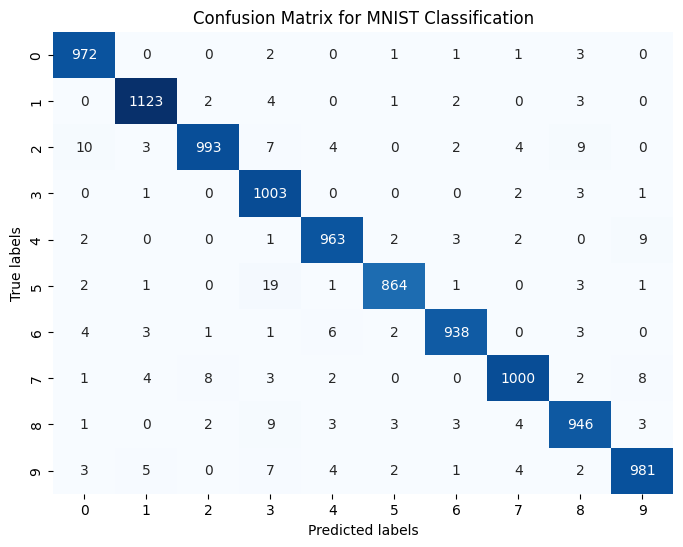

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Classification with a Convolutional Neural Network



### Types of Layers and Keras Syntax

* Conv2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    * The first number is the number of filters (dimensionality of the output)
    * The tuple is the stride (the width and height of the section of pixels to be reduced down)
    * Activation has the same function here as in regular neural networks
    * Convolutional layers apply learnable filters to the data that creates a feature map to a higher or lower dimensional space
    * Used to detect important features and patterns in the data
* MaxPooling2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)
    * Tuple is the pool size (the size block over which to find the maximum)
    * Pooling layers reduce the dimensionality of the data while keeping the most important features
    * Two types of pooling layers: max pooling and average pooling
* Stacking convolutional and pooling layers allows CNNS to learn in a heirarchical manner
    * First the networks learns basic featutes of the data (like edges and textures) and then more complicated features
    * This heirarchical learning is what makes CNNS so effective at image analysis
* Note that not every convolutional layer has to be followed by a pooling layer, too many pooling layers can be bad

### Full Neural Network for Classification
* Have two pairs of convolutional layers/pooling layers of different sizes followed by a lone convolutional layer
* The `Flatten()` layer is needed to take the 2D data down to one dimension for the dense layers
* The first dense layer (a hidden layer) does some post-processing on the data that comes from the CNN layers, the second dense layer is the output layer

In [11]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* Model is compiled, trained, and tested in the same way as the regular neural network

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


  1/844 [..............................] - ETA: 3:26 - loss: 2.3083 - accuracy: 0.1094

  4/844 [..............................] - ETA: 15s - loss: 2.2893 - accuracy: 0.1484 

  7/844 [..............................] - ETA: 14s - loss: 2.2696 - accuracy: 0.1585

 10/844 [..............................] - ETA: 15s - loss: 2.2452 - accuracy: 0.2078

 13/844 [..............................] - ETA: 15s - loss: 2.2000 - accuracy: 0.2500

 17/844 [..............................] - ETA: 14s - loss: 2.1366 - accuracy: 0.2960

 21/844 [..............................] - ETA: 14s - loss: 2.0514 - accuracy: 0.3281

 23/844 [..............................] - ETA: 14s - loss: 2.0010 - accuracy: 0.3485

 25/844 [..............................] - ETA: 15s - loss: 1.9409 - accuracy: 0.3700

 29/844 [>.............................] - ETA: 15s - loss: 1.8312 - accuracy: 0.4084

 33/844 [>.............................] - ETA: 14s - loss: 1.7231 - accuracy: 0.4503

 36/844 [>.............................] - ETA: 14s - loss: 1.6445 - accuracy: 0.4735

 39/844 [>.............................] - ETA: 14s - loss: 1.5668 - accuracy: 0.5020

 42/844 [>.............................] - ETA: 14s - loss: 1.4974 - accuracy: 0.5231

 45/844 [>.............................] - ETA: 14s - loss: 1.4372 - accuracy: 0.5424

 48/844 [>.............................] - ETA: 14s - loss: 1.3863 - accuracy: 0.5576

 51/844 [>.............................] - ETA: 14s - loss: 1.3390 - accuracy: 0.5708

 54/844 [>.............................] - ETA: 14s - loss: 1.2913 - accuracy: 0.5859

 57/844 [=>............................] - ETA: 14s - loss: 1.2541 - accuracy: 0.5995

 60/844 [=>............................] - ETA: 14s - loss: 1.2178 - accuracy: 0.6104

 63/844 [=>............................] - ETA: 14s - loss: 1.1802 - accuracy: 0.6228

 66/844 [=>............................] - ETA: 14s - loss: 1.1478 - accuracy: 0.6340

 69/844 [=>............................] - ETA: 14s - loss: 1.1192 - accuracy: 0.6436

 73/844 [=>............................] - ETA: 14s - loss: 1.0826 - accuracy: 0.6554

 76/844 [=>............................] - ETA: 14s - loss: 1.0526 - accuracy: 0.6655

 80/844 [=>............................] - ETA: 13s - loss: 1.0218 - accuracy: 0.6760

 84/844 [=>............................] - ETA: 13s - loss: 0.9916 - accuracy: 0.6845

 87/844 [==>...........................] - ETA: 13s - loss: 0.9693 - accuracy: 0.6916

 90/844 [==>...........................] - ETA: 13s - loss: 0.9472 - accuracy: 0.6988

 93/844 [==>...........................] - ETA: 13s - loss: 0.9247 - accuracy: 0.7060

 96/844 [==>...........................] - ETA: 13s - loss: 0.9058 - accuracy: 0.7122

 99/844 [==>...........................] - ETA: 13s - loss: 0.8848 - accuracy: 0.7191

102/844 [==>...........................] - ETA: 13s - loss: 0.8641 - accuracy: 0.7255

105/844 [==>...........................] - ETA: 13s - loss: 0.8449 - accuracy: 0.7317

108/844 [==>...........................] - ETA: 13s - loss: 0.8277 - accuracy: 0.7377

111/844 [==>...........................] - ETA: 13s - loss: 0.8127 - accuracy: 0.7421

114/844 [===>..........................] - ETA: 13s - loss: 0.7991 - accuracy: 0.7463

117/844 [===>..........................] - ETA: 13s - loss: 0.7865 - accuracy: 0.7504

120/844 [===>..........................] - ETA: 13s - loss: 0.7727 - accuracy: 0.7544

123/844 [===>..........................] - ETA: 13s - loss: 0.7603 - accuracy: 0.7585

126/844 [===>..........................] - ETA: 13s - loss: 0.7497 - accuracy: 0.7619

129/844 [===>..........................] - ETA: 13s - loss: 0.7380 - accuracy: 0.7655

132/844 [===>..........................] - ETA: 13s - loss: 0.7270 - accuracy: 0.7688

135/844 [===>..........................] - ETA: 13s - loss: 0.7185 - accuracy: 0.7712

138/844 [===>..........................] - ETA: 13s - loss: 0.7092 - accuracy: 0.7742

141/844 [====>.........................] - ETA: 13s - loss: 0.6989 - accuracy: 0.7776

144/844 [====>.........................] - ETA: 13s - loss: 0.6881 - accuracy: 0.7811

147/844 [====>.........................] - ETA: 12s - loss: 0.6786 - accuracy: 0.7841

150/844 [====>.........................] - ETA: 12s - loss: 0.6694 - accuracy: 0.7871

153/844 [====>.........................] - ETA: 12s - loss: 0.6602 - accuracy: 0.7896

156/844 [====>.........................] - ETA: 12s - loss: 0.6522 - accuracy: 0.7925

159/844 [====>.........................] - ETA: 12s - loss: 0.6442 - accuracy: 0.7950

162/844 [====>.........................] - ETA: 12s - loss: 0.6363 - accuracy: 0.7974

165/844 [====>.........................] - ETA: 12s - loss: 0.6267 - accuracy: 0.8002

168/844 [====>.........................] - ETA: 12s - loss: 0.6204 - accuracy: 0.8025

171/844 [=====>........................] - ETA: 12s - loss: 0.6122 - accuracy: 0.8052

174/844 [=====>........................] - ETA: 12s - loss: 0.6041 - accuracy: 0.8076

177/844 [=====>........................] - ETA: 12s - loss: 0.5976 - accuracy: 0.8095

180/844 [=====>........................] - ETA: 12s - loss: 0.5923 - accuracy: 0.8114

183/844 [=====>........................] - ETA: 12s - loss: 0.5862 - accuracy: 0.8136

185/844 [=====>........................] - ETA: 12s - loss: 0.5809 - accuracy: 0.8154

188/844 [=====>........................] - ETA: 12s - loss: 0.5766 - accuracy: 0.8167

192/844 [=====>........................] - ETA: 12s - loss: 0.5698 - accuracy: 0.8191

195/844 [=====>........................] - ETA: 12s - loss: 0.5649 - accuracy: 0.8204

197/844 [======>.......................] - ETA: 12s - loss: 0.5604 - accuracy: 0.8219

199/844 [======>.......................] - ETA: 12s - loss: 0.5569 - accuracy: 0.8227

201/844 [======>.......................] - ETA: 12s - loss: 0.5529 - accuracy: 0.8241

204/844 [======>.......................] - ETA: 12s - loss: 0.5471 - accuracy: 0.8259

207/844 [======>.......................] - ETA: 12s - loss: 0.5420 - accuracy: 0.8275

210/844 [======>.......................] - ETA: 12s - loss: 0.5361 - accuracy: 0.8293

214/844 [======>.......................] - ETA: 12s - loss: 0.5289 - accuracy: 0.8317

217/844 [======>.......................] - ETA: 12s - loss: 0.5246 - accuracy: 0.8332

219/844 [======>.......................] - ETA: 12s - loss: 0.5210 - accuracy: 0.8345

222/844 [======>.......................] - ETA: 12s - loss: 0.5155 - accuracy: 0.8365

224/844 [======>.......................] - ETA: 12s - loss: 0.5118 - accuracy: 0.8377

226/844 [=======>......................] - ETA: 12s - loss: 0.5085 - accuracy: 0.8386

228/844 [=======>......................] - ETA: 12s - loss: 0.5060 - accuracy: 0.8396

232/844 [=======>......................] - ETA: 11s - loss: 0.4997 - accuracy: 0.8417

236/844 [=======>......................] - ETA: 11s - loss: 0.4943 - accuracy: 0.8433

239/844 [=======>......................] - ETA: 11s - loss: 0.4910 - accuracy: 0.8443

242/844 [=======>......................] - ETA: 11s - loss: 0.4865 - accuracy: 0.8458

245/844 [=======>......................] - ETA: 11s - loss: 0.4822 - accuracy: 0.8472

248/844 [=======>......................] - ETA: 11s - loss: 0.4782 - accuracy: 0.8485

251/844 [=======>......................] - ETA: 11s - loss: 0.4737 - accuracy: 0.8499

254/844 [========>.....................] - ETA: 11s - loss: 0.4702 - accuracy: 0.8510

257/844 [========>.....................] - ETA: 11s - loss: 0.4670 - accuracy: 0.8523

260/844 [========>.....................] - ETA: 11s - loss: 0.4627 - accuracy: 0.8537

263/844 [========>.....................] - ETA: 11s - loss: 0.4591 - accuracy: 0.8548

266/844 [========>.....................] - ETA: 11s - loss: 0.4567 - accuracy: 0.8557

269/844 [========>.....................] - ETA: 11s - loss: 0.4524 - accuracy: 0.8570

272/844 [========>.....................] - ETA: 11s - loss: 0.4498 - accuracy: 0.8580

275/844 [========>.....................] - ETA: 11s - loss: 0.4467 - accuracy: 0.8589

278/844 [========>.....................] - ETA: 10s - loss: 0.4430 - accuracy: 0.8600

281/844 [========>.....................] - ETA: 10s - loss: 0.4399 - accuracy: 0.8610

284/844 [=========>....................] - ETA: 10s - loss: 0.4365 - accuracy: 0.8621

287/844 [=========>....................] - ETA: 10s - loss: 0.4333 - accuracy: 0.8631

290/844 [=========>....................] - ETA: 10s - loss: 0.4310 - accuracy: 0.8638

293/844 [=========>....................] - ETA: 10s - loss: 0.4278 - accuracy: 0.8649

296/844 [=========>....................] - ETA: 10s - loss: 0.4246 - accuracy: 0.8660

299/844 [=========>....................] - ETA: 10s - loss: 0.4221 - accuracy: 0.8668

302/844 [=========>....................] - ETA: 10s - loss: 0.4198 - accuracy: 0.8677

305/844 [=========>....................] - ETA: 10s - loss: 0.4169 - accuracy: 0.8685

308/844 [=========>....................] - ETA: 10s - loss: 0.4140 - accuracy: 0.8695

311/844 [==========>...................] - ETA: 10s - loss: 0.4107 - accuracy: 0.8705

314/844 [==========>...................] - ETA: 10s - loss: 0.4083 - accuracy: 0.8714

317/844 [==========>...................] - ETA: 10s - loss: 0.4059 - accuracy: 0.8722

320/844 [==========>...................] - ETA: 10s - loss: 0.4034 - accuracy: 0.8731

323/844 [==========>...................] - ETA: 10s - loss: 0.4009 - accuracy: 0.8740

326/844 [==========>...................] - ETA: 10s - loss: 0.3985 - accuracy: 0.8748

329/844 [==========>...................] - ETA: 9s - loss: 0.3959 - accuracy: 0.8757 

332/844 [==========>...................] - ETA: 9s - loss: 0.3932 - accuracy: 0.8765

335/844 [==========>...................] - ETA: 9s - loss: 0.3905 - accuracy: 0.8775

338/844 [===========>..................] - ETA: 9s - loss: 0.3878 - accuracy: 0.8783

341/844 [===========>..................] - ETA: 9s - loss: 0.3855 - accuracy: 0.8790

344/844 [===========>..................] - ETA: 9s - loss: 0.3824 - accuracy: 0.8801

347/844 [===========>..................] - ETA: 9s - loss: 0.3801 - accuracy: 0.8809

350/844 [===========>..................] - ETA: 9s - loss: 0.3778 - accuracy: 0.8815

353/844 [===========>..................] - ETA: 9s - loss: 0.3761 - accuracy: 0.8821

356/844 [===========>..................] - ETA: 9s - loss: 0.3737 - accuracy: 0.8828

359/844 [===========>..................] - ETA: 9s - loss: 0.3717 - accuracy: 0.8834

362/844 [===========>..................] - ETA: 9s - loss: 0.3696 - accuracy: 0.8840

365/844 [===========>..................] - ETA: 9s - loss: 0.3676 - accuracy: 0.8848

368/844 [============>.................] - ETA: 9s - loss: 0.3656 - accuracy: 0.8853

371/844 [============>.................] - ETA: 9s - loss: 0.3638 - accuracy: 0.8860

374/844 [============>.................] - ETA: 9s - loss: 0.3621 - accuracy: 0.8865

377/844 [============>.................] - ETA: 9s - loss: 0.3606 - accuracy: 0.8871

380/844 [============>.................] - ETA: 8s - loss: 0.3586 - accuracy: 0.8877

383/844 [============>.................] - ETA: 8s - loss: 0.3564 - accuracy: 0.8884

386/844 [============>.................] - ETA: 8s - loss: 0.3545 - accuracy: 0.8890

389/844 [============>.................] - ETA: 8s - loss: 0.3522 - accuracy: 0.8897

392/844 [============>.................] - ETA: 8s - loss: 0.3507 - accuracy: 0.8903

395/844 [=============>................] - ETA: 8s - loss: 0.3493 - accuracy: 0.8907

398/844 [=============>................] - ETA: 8s - loss: 0.3473 - accuracy: 0.8913

401/844 [=============>................] - ETA: 8s - loss: 0.3459 - accuracy: 0.8918

404/844 [=============>................] - ETA: 8s - loss: 0.3446 - accuracy: 0.8923

407/844 [=============>................] - ETA: 8s - loss: 0.3425 - accuracy: 0.8930

410/844 [=============>................] - ETA: 8s - loss: 0.3405 - accuracy: 0.8936

413/844 [=============>................] - ETA: 8s - loss: 0.3388 - accuracy: 0.8941

416/844 [=============>................] - ETA: 8s - loss: 0.3369 - accuracy: 0.8946

419/844 [=============>................] - ETA: 8s - loss: 0.3353 - accuracy: 0.8952

422/844 [==============>...............] - ETA: 8s - loss: 0.3338 - accuracy: 0.8957

425/844 [==============>...............] - ETA: 8s - loss: 0.3323 - accuracy: 0.8961

428/844 [==============>...............] - ETA: 8s - loss: 0.3307 - accuracy: 0.8966

431/844 [==============>...............] - ETA: 7s - loss: 0.3292 - accuracy: 0.8971

434/844 [==============>...............] - ETA: 7s - loss: 0.3275 - accuracy: 0.8976

437/844 [==============>...............] - ETA: 7s - loss: 0.3262 - accuracy: 0.8980

440/844 [==============>...............] - ETA: 7s - loss: 0.3248 - accuracy: 0.8985

443/844 [==============>...............] - ETA: 7s - loss: 0.3230 - accuracy: 0.8991

446/844 [==============>...............] - ETA: 7s - loss: 0.3223 - accuracy: 0.8994

449/844 [==============>...............] - ETA: 7s - loss: 0.3213 - accuracy: 0.8997

452/844 [===============>..............] - ETA: 7s - loss: 0.3202 - accuracy: 0.9000

455/844 [===============>..............] - ETA: 7s - loss: 0.3186 - accuracy: 0.9005

458/844 [===============>..............] - ETA: 7s - loss: 0.3173 - accuracy: 0.9009

461/844 [===============>..............] - ETA: 7s - loss: 0.3158 - accuracy: 0.9014

464/844 [===============>..............] - ETA: 7s - loss: 0.3142 - accuracy: 0.9018

467/844 [===============>..............] - ETA: 7s - loss: 0.3126 - accuracy: 0.9023

470/844 [===============>..............] - ETA: 7s - loss: 0.3111 - accuracy: 0.9028

473/844 [===============>..............] - ETA: 7s - loss: 0.3098 - accuracy: 0.9032

476/844 [===============>..............] - ETA: 7s - loss: 0.3085 - accuracy: 0.9037

479/844 [================>.............] - ETA: 7s - loss: 0.3067 - accuracy: 0.9042

482/844 [================>.............] - ETA: 6s - loss: 0.3057 - accuracy: 0.9045

485/844 [================>.............] - ETA: 6s - loss: 0.3044 - accuracy: 0.9048

488/844 [================>.............] - ETA: 6s - loss: 0.3032 - accuracy: 0.9053

491/844 [================>.............] - ETA: 6s - loss: 0.3020 - accuracy: 0.9055

494/844 [================>.............] - ETA: 6s - loss: 0.3009 - accuracy: 0.9060

497/844 [================>.............] - ETA: 6s - loss: 0.3000 - accuracy: 0.9063

500/844 [================>.............] - ETA: 6s - loss: 0.2985 - accuracy: 0.9068

503/844 [================>.............] - ETA: 6s - loss: 0.2973 - accuracy: 0.9071

506/844 [================>.............] - ETA: 6s - loss: 0.2961 - accuracy: 0.9075

509/844 [=================>............] - ETA: 6s - loss: 0.2950 - accuracy: 0.9078

512/844 [=================>............] - ETA: 6s - loss: 0.2938 - accuracy: 0.9083

515/844 [=================>............] - ETA: 6s - loss: 0.2926 - accuracy: 0.9086

518/844 [=================>............] - ETA: 6s - loss: 0.2915 - accuracy: 0.9090

521/844 [=================>............] - ETA: 6s - loss: 0.2905 - accuracy: 0.9093

524/844 [=================>............] - ETA: 6s - loss: 0.2892 - accuracy: 0.9097

527/844 [=================>............] - ETA: 6s - loss: 0.2880 - accuracy: 0.9102

530/844 [=================>............] - ETA: 6s - loss: 0.2866 - accuracy: 0.9106

533/844 [=================>............] - ETA: 5s - loss: 0.2855 - accuracy: 0.9110

536/844 [==================>...........] - ETA: 5s - loss: 0.2841 - accuracy: 0.9115

539/844 [==================>...........] - ETA: 5s - loss: 0.2830 - accuracy: 0.9118

542/844 [==================>...........] - ETA: 5s - loss: 0.2819 - accuracy: 0.9122

545/844 [==================>...........] - ETA: 5s - loss: 0.2809 - accuracy: 0.9125

548/844 [==================>...........] - ETA: 5s - loss: 0.2800 - accuracy: 0.9128

551/844 [==================>...........] - ETA: 5s - loss: 0.2789 - accuracy: 0.9131

554/844 [==================>...........] - ETA: 5s - loss: 0.2783 - accuracy: 0.9133

557/844 [==================>...........] - ETA: 5s - loss: 0.2772 - accuracy: 0.9136

560/844 [==================>...........] - ETA: 5s - loss: 0.2761 - accuracy: 0.9140

563/844 [===================>..........] - ETA: 5s - loss: 0.2754 - accuracy: 0.9142

566/844 [===================>..........] - ETA: 5s - loss: 0.2744 - accuracy: 0.9144

569/844 [===================>..........] - ETA: 5s - loss: 0.2732 - accuracy: 0.9148

572/844 [===================>..........] - ETA: 5s - loss: 0.2726 - accuracy: 0.9150

575/844 [===================>..........] - ETA: 5s - loss: 0.2718 - accuracy: 0.9153

578/844 [===================>..........] - ETA: 5s - loss: 0.2709 - accuracy: 0.9155

581/844 [===================>..........] - ETA: 5s - loss: 0.2699 - accuracy: 0.9158

584/844 [===================>..........] - ETA: 4s - loss: 0.2687 - accuracy: 0.9162

587/844 [===================>..........] - ETA: 4s - loss: 0.2676 - accuracy: 0.9166

590/844 [===================>..........] - ETA: 4s - loss: 0.2670 - accuracy: 0.9167

593/844 [====================>.........] - ETA: 4s - loss: 0.2660 - accuracy: 0.9170

596/844 [====================>.........] - ETA: 4s - loss: 0.2653 - accuracy: 0.9173

599/844 [====================>.........] - ETA: 4s - loss: 0.2643 - accuracy: 0.9176

602/844 [====================>.........] - ETA: 4s - loss: 0.2634 - accuracy: 0.9179

605/844 [====================>.........] - ETA: 4s - loss: 0.2627 - accuracy: 0.9182

608/844 [====================>.........] - ETA: 4s - loss: 0.2621 - accuracy: 0.9184

611/844 [====================>.........] - ETA: 4s - loss: 0.2614 - accuracy: 0.9186

614/844 [====================>.........] - ETA: 4s - loss: 0.2604 - accuracy: 0.9189

617/844 [====================>.........] - ETA: 4s - loss: 0.2593 - accuracy: 0.9193

620/844 [=====================>........] - ETA: 4s - loss: 0.2583 - accuracy: 0.9196

623/844 [=====================>........] - ETA: 4s - loss: 0.2573 - accuracy: 0.9199

626/844 [=====================>........] - ETA: 4s - loss: 0.2564 - accuracy: 0.9202

629/844 [=====================>........] - ETA: 4s - loss: 0.2556 - accuracy: 0.9204

632/844 [=====================>........] - ETA: 4s - loss: 0.2547 - accuracy: 0.9206

635/844 [=====================>........] - ETA: 4s - loss: 0.2539 - accuracy: 0.9209

638/844 [=====================>........] - ETA: 3s - loss: 0.2531 - accuracy: 0.9212

641/844 [=====================>........] - ETA: 3s - loss: 0.2521 - accuracy: 0.9215

644/844 [=====================>........] - ETA: 3s - loss: 0.2514 - accuracy: 0.9217

647/844 [=====================>........] - ETA: 3s - loss: 0.2507 - accuracy: 0.9219

650/844 [======================>.......] - ETA: 3s - loss: 0.2497 - accuracy: 0.9222

653/844 [======================>.......] - ETA: 3s - loss: 0.2488 - accuracy: 0.9225

656/844 [======================>.......] - ETA: 3s - loss: 0.2479 - accuracy: 0.9228

659/844 [======================>.......] - ETA: 3s - loss: 0.2474 - accuracy: 0.9230

662/844 [======================>.......] - ETA: 3s - loss: 0.2468 - accuracy: 0.9232

665/844 [======================>.......] - ETA: 3s - loss: 0.2463 - accuracy: 0.9234

668/844 [======================>.......] - ETA: 3s - loss: 0.2455 - accuracy: 0.9236

671/844 [======================>.......] - ETA: 3s - loss: 0.2450 - accuracy: 0.9238

675/844 [======================>.......] - ETA: 3s - loss: 0.2440 - accuracy: 0.9241

678/844 [=======================>......] - ETA: 3s - loss: 0.2431 - accuracy: 0.9244

681/844 [=======================>......] - ETA: 3s - loss: 0.2424 - accuracy: 0.9246

684/844 [=======================>......] - ETA: 3s - loss: 0.2417 - accuracy: 0.9248

687/844 [=======================>......] - ETA: 3s - loss: 0.2409 - accuracy: 0.9251

690/844 [=======================>......] - ETA: 2s - loss: 0.2401 - accuracy: 0.9253

693/844 [=======================>......] - ETA: 2s - loss: 0.2392 - accuracy: 0.9256

696/844 [=======================>......] - ETA: 2s - loss: 0.2386 - accuracy: 0.9258

699/844 [=======================>......] - ETA: 2s - loss: 0.2379 - accuracy: 0.9260

702/844 [=======================>......] - ETA: 2s - loss: 0.2371 - accuracy: 0.9262

705/844 [========================>.....] - ETA: 2s - loss: 0.2364 - accuracy: 0.9264

708/844 [========================>.....] - ETA: 2s - loss: 0.2360 - accuracy: 0.9266

711/844 [========================>.....] - ETA: 2s - loss: 0.2355 - accuracy: 0.9268

714/844 [========================>.....] - ETA: 2s - loss: 0.2354 - accuracy: 0.9268

717/844 [========================>.....] - ETA: 2s - loss: 0.2347 - accuracy: 0.9271

720/844 [========================>.....] - ETA: 2s - loss: 0.2342 - accuracy: 0.9272

723/844 [========================>.....] - ETA: 2s - loss: 0.2338 - accuracy: 0.9273

726/844 [========================>.....] - ETA: 2s - loss: 0.2334 - accuracy: 0.9275

729/844 [========================>.....] - ETA: 2s - loss: 0.2330 - accuracy: 0.9276

733/844 [=========================>....] - ETA: 2s - loss: 0.2320 - accuracy: 0.9279

736/844 [=========================>....] - ETA: 2s - loss: 0.2315 - accuracy: 0.9281

739/844 [=========================>....] - ETA: 2s - loss: 0.2310 - accuracy: 0.9282

742/844 [=========================>....] - ETA: 1s - loss: 0.2304 - accuracy: 0.9284

745/844 [=========================>....] - ETA: 1s - loss: 0.2300 - accuracy: 0.9285

748/844 [=========================>....] - ETA: 1s - loss: 0.2297 - accuracy: 0.9286

751/844 [=========================>....] - ETA: 1s - loss: 0.2290 - accuracy: 0.9289

754/844 [=========================>....] - ETA: 1s - loss: 0.2284 - accuracy: 0.9291

757/844 [=========================>....] - ETA: 1s - loss: 0.2278 - accuracy: 0.9293

760/844 [==========================>...] - ETA: 1s - loss: 0.2273 - accuracy: 0.9294

763/844 [==========================>...] - ETA: 1s - loss: 0.2269 - accuracy: 0.9296

766/844 [==========================>...] - ETA: 1s - loss: 0.2262 - accuracy: 0.9298

769/844 [==========================>...] - ETA: 1s - loss: 0.2256 - accuracy: 0.9300

772/844 [==========================>...] - ETA: 1s - loss: 0.2252 - accuracy: 0.9301

775/844 [==========================>...] - ETA: 1s - loss: 0.2248 - accuracy: 0.9302

778/844 [==========================>...] - ETA: 1s - loss: 0.2242 - accuracy: 0.9304

781/844 [==========================>...] - ETA: 1s - loss: 0.2237 - accuracy: 0.9305

784/844 [==========================>...] - ETA: 1s - loss: 0.2231 - accuracy: 0.9307

787/844 [==========================>...] - ETA: 1s - loss: 0.2225 - accuracy: 0.9309

790/844 [===========================>..] - ETA: 1s - loss: 0.2219 - accuracy: 0.9311

793/844 [===========================>..] - ETA: 0s - loss: 0.2212 - accuracy: 0.9313

796/844 [===========================>..] - ETA: 0s - loss: 0.2206 - accuracy: 0.9315

799/844 [===========================>..] - ETA: 0s - loss: 0.2200 - accuracy: 0.9317

802/844 [===========================>..] - ETA: 0s - loss: 0.2193 - accuracy: 0.9319

805/844 [===========================>..] - ETA: 0s - loss: 0.2187 - accuracy: 0.9321

808/844 [===========================>..] - ETA: 0s - loss: 0.2181 - accuracy: 0.9323

811/844 [===========================>..] - ETA: 0s - loss: 0.2175 - accuracy: 0.9325

814/844 [===========================>..] - ETA: 0s - loss: 0.2168 - accuracy: 0.9326

817/844 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9328

820/844 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9330

823/844 [============================>.] - ETA: 0s - loss: 0.2151 - accuracy: 0.9332

826/844 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9335

829/844 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9336

832/844 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9338

835/844 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9340

838/844 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9343

841/844 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9344

844/844 [==============================] - ETA: 0s - loss: 0.2111 - accuracy: 0.9345

844/844 [==============================] - 17s 20ms/step - loss: 0.2111 - accuracy: 0.9345 - val_loss: 0.0474 - val_accuracy: 0.9860


Epoch 2/5


  1/844 [..............................] - ETA: 17s - loss: 0.0084 - accuracy: 1.0000

  4/844 [..............................] - ETA: 16s - loss: 0.0184 - accuracy: 1.0000

  7/844 [..............................] - ETA: 16s - loss: 0.0221 - accuracy: 0.9978

 10/844 [..............................] - ETA: 15s - loss: 0.0305 - accuracy: 0.9922

 13/844 [..............................] - ETA: 16s - loss: 0.0320 - accuracy: 0.9916

 16/844 [..............................] - ETA: 15s - loss: 0.0405 - accuracy: 0.9883

 19/844 [..............................] - ETA: 15s - loss: 0.0433 - accuracy: 0.9877

 22/844 [..............................] - ETA: 15s - loss: 0.0420 - accuracy: 0.9886

 25/844 [..............................] - ETA: 15s - loss: 0.0425 - accuracy: 0.9881

 28/844 [..............................] - ETA: 15s - loss: 0.0474 - accuracy: 0.9855

 31/844 [>.............................] - ETA: 15s - loss: 0.0488 - accuracy: 0.9834

 34/844 [>.............................] - ETA: 15s - loss: 0.0487 - accuracy: 0.9835

 37/844 [>.............................] - ETA: 15s - loss: 0.0500 - accuracy: 0.9831

 40/844 [>.............................] - ETA: 15s - loss: 0.0521 - accuracy: 0.9816

 43/844 [>.............................] - ETA: 15s - loss: 0.0529 - accuracy: 0.9818

 46/844 [>.............................] - ETA: 15s - loss: 0.0545 - accuracy: 0.9817

 49/844 [>.............................] - ETA: 15s - loss: 0.0528 - accuracy: 0.9825

 52/844 [>.............................] - ETA: 15s - loss: 0.0513 - accuracy: 0.9829

 55/844 [>.............................] - ETA: 15s - loss: 0.0505 - accuracy: 0.9830

 58/844 [=>............................] - ETA: 15s - loss: 0.0504 - accuracy: 0.9830

 61/844 [=>............................] - ETA: 14s - loss: 0.0528 - accuracy: 0.9828

 64/844 [=>............................] - ETA: 14s - loss: 0.0540 - accuracy: 0.9824

 67/844 [=>............................] - ETA: 14s - loss: 0.0527 - accuracy: 0.9830

 70/844 [=>............................] - ETA: 14s - loss: 0.0517 - accuracy: 0.9833

 73/844 [=>............................] - ETA: 14s - loss: 0.0522 - accuracy: 0.9829

 76/844 [=>............................] - ETA: 14s - loss: 0.0544 - accuracy: 0.9827

 79/844 [=>............................] - ETA: 14s - loss: 0.0582 - accuracy: 0.9820

 82/844 [=>............................] - ETA: 14s - loss: 0.0584 - accuracy: 0.9817

 85/844 [==>...........................] - ETA: 14s - loss: 0.0616 - accuracy: 0.9809

 88/844 [==>...........................] - ETA: 14s - loss: 0.0620 - accuracy: 0.9806

 91/844 [==>...........................] - ETA: 14s - loss: 0.0629 - accuracy: 0.9804

 94/844 [==>...........................] - ETA: 14s - loss: 0.0621 - accuracy: 0.9806

 97/844 [==>...........................] - ETA: 14s - loss: 0.0614 - accuracy: 0.9807

100/844 [==>...........................] - ETA: 14s - loss: 0.0614 - accuracy: 0.9809

103/844 [==>...........................] - ETA: 14s - loss: 0.0612 - accuracy: 0.9812

106/844 [==>...........................] - ETA: 14s - loss: 0.0603 - accuracy: 0.9816

109/844 [==>...........................] - ETA: 14s - loss: 0.0602 - accuracy: 0.9819

112/844 [==>...........................] - ETA: 13s - loss: 0.0608 - accuracy: 0.9817

115/844 [===>..........................] - ETA: 13s - loss: 0.0603 - accuracy: 0.9819

118/844 [===>..........................] - ETA: 13s - loss: 0.0598 - accuracy: 0.9820

121/844 [===>..........................] - ETA: 13s - loss: 0.0591 - accuracy: 0.9822

124/844 [===>..........................] - ETA: 13s - loss: 0.0592 - accuracy: 0.9822

127/844 [===>..........................] - ETA: 13s - loss: 0.0596 - accuracy: 0.9822

130/844 [===>..........................] - ETA: 13s - loss: 0.0598 - accuracy: 0.9823

133/844 [===>..........................] - ETA: 13s - loss: 0.0601 - accuracy: 0.9818

136/844 [===>..........................] - ETA: 13s - loss: 0.0614 - accuracy: 0.9816

139/844 [===>..........................] - ETA: 13s - loss: 0.0609 - accuracy: 0.9817

142/844 [====>.........................] - ETA: 13s - loss: 0.0622 - accuracy: 0.9814

145/844 [====>.........................] - ETA: 13s - loss: 0.0628 - accuracy: 0.9811

148/844 [====>.........................] - ETA: 13s - loss: 0.0630 - accuracy: 0.9811

151/844 [====>.........................] - ETA: 13s - loss: 0.0637 - accuracy: 0.9810

154/844 [====>.........................] - ETA: 13s - loss: 0.0631 - accuracy: 0.9812

157/844 [====>.........................] - ETA: 13s - loss: 0.0624 - accuracy: 0.9814

160/844 [====>.........................] - ETA: 13s - loss: 0.0618 - accuracy: 0.9815

163/844 [====>.........................] - ETA: 13s - loss: 0.0615 - accuracy: 0.9816

166/844 [====>.........................] - ETA: 12s - loss: 0.0609 - accuracy: 0.9818

169/844 [=====>........................] - ETA: 12s - loss: 0.0624 - accuracy: 0.9813

172/844 [=====>........................] - ETA: 12s - loss: 0.0628 - accuracy: 0.9810

175/844 [=====>........................] - ETA: 12s - loss: 0.0637 - accuracy: 0.9806

178/844 [=====>........................] - ETA: 12s - loss: 0.0634 - accuracy: 0.9807

181/844 [=====>........................] - ETA: 12s - loss: 0.0628 - accuracy: 0.9809

184/844 [=====>........................] - ETA: 12s - loss: 0.0629 - accuracy: 0.9809

187/844 [=====>........................] - ETA: 12s - loss: 0.0629 - accuracy: 0.9809

190/844 [=====>........................] - ETA: 12s - loss: 0.0635 - accuracy: 0.9806

193/844 [=====>........................] - ETA: 12s - loss: 0.0628 - accuracy: 0.9809

196/844 [=====>........................] - ETA: 12s - loss: 0.0624 - accuracy: 0.9810

199/844 [======>.......................] - ETA: 12s - loss: 0.0624 - accuracy: 0.9812

202/844 [======>.......................] - ETA: 12s - loss: 0.0630 - accuracy: 0.9811

205/844 [======>.......................] - ETA: 12s - loss: 0.0628 - accuracy: 0.9812

208/844 [======>.......................] - ETA: 12s - loss: 0.0624 - accuracy: 0.9814

211/844 [======>.......................] - ETA: 12s - loss: 0.0621 - accuracy: 0.9813

214/844 [======>.......................] - ETA: 12s - loss: 0.0624 - accuracy: 0.9813

217/844 [======>.......................] - ETA: 12s - loss: 0.0620 - accuracy: 0.9814

220/844 [======>.......................] - ETA: 11s - loss: 0.0614 - accuracy: 0.9816

223/844 [======>.......................] - ETA: 11s - loss: 0.0610 - accuracy: 0.9817

226/844 [=======>......................] - ETA: 11s - loss: 0.0609 - accuracy: 0.9818

229/844 [=======>......................] - ETA: 11s - loss: 0.0612 - accuracy: 0.9816

232/844 [=======>......................] - ETA: 11s - loss: 0.0615 - accuracy: 0.9816

235/844 [=======>......................] - ETA: 11s - loss: 0.0617 - accuracy: 0.9815

238/844 [=======>......................] - ETA: 11s - loss: 0.0621 - accuracy: 0.9814

241/844 [=======>......................] - ETA: 11s - loss: 0.0626 - accuracy: 0.9813

244/844 [=======>......................] - ETA: 11s - loss: 0.0628 - accuracy: 0.9812

247/844 [=======>......................] - ETA: 11s - loss: 0.0631 - accuracy: 0.9810

250/844 [=======>......................] - ETA: 11s - loss: 0.0638 - accuracy: 0.9809

253/844 [=======>......................] - ETA: 11s - loss: 0.0640 - accuracy: 0.9810

256/844 [========>.....................] - ETA: 11s - loss: 0.0638 - accuracy: 0.9811

259/844 [========>.....................] - ETA: 11s - loss: 0.0637 - accuracy: 0.9811

262/844 [========>.....................] - ETA: 11s - loss: 0.0636 - accuracy: 0.9810

265/844 [========>.....................] - ETA: 11s - loss: 0.0633 - accuracy: 0.9811

268/844 [========>.....................] - ETA: 11s - loss: 0.0629 - accuracy: 0.9812

271/844 [========>.....................] - ETA: 11s - loss: 0.0624 - accuracy: 0.9814

274/844 [========>.....................] - ETA: 10s - loss: 0.0622 - accuracy: 0.9815

277/844 [========>.....................] - ETA: 10s - loss: 0.0626 - accuracy: 0.9814

280/844 [========>.....................] - ETA: 10s - loss: 0.0628 - accuracy: 0.9814

283/844 [=========>....................] - ETA: 10s - loss: 0.0627 - accuracy: 0.9813

286/844 [=========>....................] - ETA: 10s - loss: 0.0629 - accuracy: 0.9812

289/844 [=========>....................] - ETA: 10s - loss: 0.0626 - accuracy: 0.9813

291/844 [=========>....................] - ETA: 10s - loss: 0.0624 - accuracy: 0.9813

294/844 [=========>....................] - ETA: 10s - loss: 0.0625 - accuracy: 0.9812

297/844 [=========>....................] - ETA: 10s - loss: 0.0622 - accuracy: 0.9814

300/844 [=========>....................] - ETA: 10s - loss: 0.0627 - accuracy: 0.9812

303/844 [=========>....................] - ETA: 10s - loss: 0.0626 - accuracy: 0.9812

306/844 [=========>....................] - ETA: 10s - loss: 0.0624 - accuracy: 0.9812

309/844 [=========>....................] - ETA: 10s - loss: 0.0622 - accuracy: 0.9812

312/844 [==========>...................] - ETA: 10s - loss: 0.0623 - accuracy: 0.9812

315/844 [==========>...................] - ETA: 10s - loss: 0.0619 - accuracy: 0.9814

318/844 [==========>...................] - ETA: 10s - loss: 0.0617 - accuracy: 0.9814

321/844 [==========>...................] - ETA: 10s - loss: 0.0617 - accuracy: 0.9815

324/844 [==========>...................] - ETA: 10s - loss: 0.0615 - accuracy: 0.9815

327/844 [==========>...................] - ETA: 9s - loss: 0.0618 - accuracy: 0.9815 

330/844 [==========>...................] - ETA: 9s - loss: 0.0614 - accuracy: 0.9815

333/844 [==========>...................] - ETA: 9s - loss: 0.0614 - accuracy: 0.9816

336/844 [==========>...................] - ETA: 9s - loss: 0.0611 - accuracy: 0.9816

339/844 [===========>..................] - ETA: 9s - loss: 0.0608 - accuracy: 0.9816

342/844 [===========>..................] - ETA: 9s - loss: 0.0608 - accuracy: 0.9816

345/844 [===========>..................] - ETA: 9s - loss: 0.0608 - accuracy: 0.9816

348/844 [===========>..................] - ETA: 9s - loss: 0.0606 - accuracy: 0.9817

351/844 [===========>..................] - ETA: 9s - loss: 0.0605 - accuracy: 0.9818

354/844 [===========>..................] - ETA: 9s - loss: 0.0605 - accuracy: 0.9818

357/844 [===========>..................] - ETA: 9s - loss: 0.0605 - accuracy: 0.9818

360/844 [===========>..................] - ETA: 9s - loss: 0.0606 - accuracy: 0.9817

363/844 [===========>..................] - ETA: 9s - loss: 0.0606 - accuracy: 0.9817

366/844 [============>.................] - ETA: 9s - loss: 0.0605 - accuracy: 0.9817

369/844 [============>.................] - ETA: 9s - loss: 0.0604 - accuracy: 0.9817

372/844 [============>.................] - ETA: 9s - loss: 0.0601 - accuracy: 0.9818

375/844 [============>.................] - ETA: 9s - loss: 0.0600 - accuracy: 0.9818

378/844 [============>.................] - ETA: 8s - loss: 0.0598 - accuracy: 0.9819

381/844 [============>.................] - ETA: 8s - loss: 0.0598 - accuracy: 0.9819

384/844 [============>.................] - ETA: 8s - loss: 0.0597 - accuracy: 0.9819

387/844 [============>.................] - ETA: 8s - loss: 0.0600 - accuracy: 0.9819

390/844 [============>.................] - ETA: 8s - loss: 0.0600 - accuracy: 0.9819

393/844 [============>.................] - ETA: 8s - loss: 0.0597 - accuracy: 0.9819

396/844 [=============>................] - ETA: 8s - loss: 0.0597 - accuracy: 0.9820

399/844 [=============>................] - ETA: 8s - loss: 0.0596 - accuracy: 0.9819

402/844 [=============>................] - ETA: 8s - loss: 0.0594 - accuracy: 0.9820

405/844 [=============>................] - ETA: 8s - loss: 0.0599 - accuracy: 0.9819

408/844 [=============>................] - ETA: 8s - loss: 0.0597 - accuracy: 0.9820

411/844 [=============>................] - ETA: 8s - loss: 0.0598 - accuracy: 0.9819

414/844 [=============>................] - ETA: 8s - loss: 0.0598 - accuracy: 0.9820

417/844 [=============>................] - ETA: 8s - loss: 0.0596 - accuracy: 0.9821

420/844 [=============>................] - ETA: 8s - loss: 0.0599 - accuracy: 0.9820

423/844 [==============>...............] - ETA: 8s - loss: 0.0596 - accuracy: 0.9821

426/844 [==============>...............] - ETA: 8s - loss: 0.0593 - accuracy: 0.9822

429/844 [==============>...............] - ETA: 8s - loss: 0.0590 - accuracy: 0.9823

432/844 [==============>...............] - ETA: 7s - loss: 0.0588 - accuracy: 0.9824

435/844 [==============>...............] - ETA: 7s - loss: 0.0586 - accuracy: 0.9825

438/844 [==============>...............] - ETA: 7s - loss: 0.0585 - accuracy: 0.9825

441/844 [==============>...............] - ETA: 7s - loss: 0.0586 - accuracy: 0.9825

444/844 [==============>...............] - ETA: 7s - loss: 0.0589 - accuracy: 0.9824

447/844 [==============>...............] - ETA: 7s - loss: 0.0591 - accuracy: 0.9823

450/844 [==============>...............] - ETA: 7s - loss: 0.0590 - accuracy: 0.9823

453/844 [===============>..............] - ETA: 7s - loss: 0.0589 - accuracy: 0.9823

456/844 [===============>..............] - ETA: 7s - loss: 0.0587 - accuracy: 0.9824

459/844 [===============>..............] - ETA: 7s - loss: 0.0586 - accuracy: 0.9824

462/844 [===============>..............] - ETA: 7s - loss: 0.0586 - accuracy: 0.9823

465/844 [===============>..............] - ETA: 7s - loss: 0.0584 - accuracy: 0.9824

468/844 [===============>..............] - ETA: 7s - loss: 0.0587 - accuracy: 0.9822

471/844 [===============>..............] - ETA: 7s - loss: 0.0589 - accuracy: 0.9822

474/844 [===============>..............] - ETA: 7s - loss: 0.0592 - accuracy: 0.9821

477/844 [===============>..............] - ETA: 7s - loss: 0.0593 - accuracy: 0.9821

480/844 [================>.............] - ETA: 7s - loss: 0.0595 - accuracy: 0.9820

483/844 [================>.............] - ETA: 7s - loss: 0.0595 - accuracy: 0.9819

486/844 [================>.............] - ETA: 6s - loss: 0.0594 - accuracy: 0.9819

489/844 [================>.............] - ETA: 6s - loss: 0.0594 - accuracy: 0.9819

492/844 [================>.............] - ETA: 6s - loss: 0.0594 - accuracy: 0.9819

495/844 [================>.............] - ETA: 6s - loss: 0.0594 - accuracy: 0.9819

498/844 [================>.............] - ETA: 6s - loss: 0.0596 - accuracy: 0.9819

501/844 [================>.............] - ETA: 6s - loss: 0.0595 - accuracy: 0.9819

504/844 [================>.............] - ETA: 6s - loss: 0.0596 - accuracy: 0.9819

507/844 [=================>............] - ETA: 6s - loss: 0.0598 - accuracy: 0.9818

510/844 [=================>............] - ETA: 6s - loss: 0.0598 - accuracy: 0.9818

513/844 [=================>............] - ETA: 6s - loss: 0.0598 - accuracy: 0.9818

516/844 [=================>............] - ETA: 6s - loss: 0.0598 - accuracy: 0.9818

519/844 [=================>............] - ETA: 6s - loss: 0.0599 - accuracy: 0.9818

522/844 [=================>............] - ETA: 6s - loss: 0.0601 - accuracy: 0.9817

525/844 [=================>............] - ETA: 6s - loss: 0.0601 - accuracy: 0.9818

528/844 [=================>............] - ETA: 6s - loss: 0.0599 - accuracy: 0.9818

531/844 [=================>............] - ETA: 6s - loss: 0.0602 - accuracy: 0.9817

534/844 [=================>............] - ETA: 6s - loss: 0.0604 - accuracy: 0.9817

537/844 [==================>...........] - ETA: 5s - loss: 0.0605 - accuracy: 0.9816

540/844 [==================>...........] - ETA: 5s - loss: 0.0604 - accuracy: 0.9816

543/844 [==================>...........] - ETA: 5s - loss: 0.0605 - accuracy: 0.9816

546/844 [==================>...........] - ETA: 5s - loss: 0.0604 - accuracy: 0.9817

549/844 [==================>...........] - ETA: 5s - loss: 0.0603 - accuracy: 0.9818

552/844 [==================>...........] - ETA: 5s - loss: 0.0602 - accuracy: 0.9818

555/844 [==================>...........] - ETA: 5s - loss: 0.0601 - accuracy: 0.9818

558/844 [==================>...........] - ETA: 5s - loss: 0.0599 - accuracy: 0.9819

561/844 [==================>...........] - ETA: 5s - loss: 0.0599 - accuracy: 0.9819

564/844 [===================>..........] - ETA: 5s - loss: 0.0597 - accuracy: 0.9819

567/844 [===================>..........] - ETA: 5s - loss: 0.0596 - accuracy: 0.9819

570/844 [===================>..........] - ETA: 5s - loss: 0.0596 - accuracy: 0.9820

573/844 [===================>..........] - ETA: 5s - loss: 0.0594 - accuracy: 0.9820

576/844 [===================>..........] - ETA: 5s - loss: 0.0594 - accuracy: 0.9820

579/844 [===================>..........] - ETA: 5s - loss: 0.0593 - accuracy: 0.9820

582/844 [===================>..........] - ETA: 5s - loss: 0.0594 - accuracy: 0.9820

585/844 [===================>..........] - ETA: 5s - loss: 0.0594 - accuracy: 0.9819

588/844 [===================>..........] - ETA: 4s - loss: 0.0592 - accuracy: 0.9820

591/844 [====================>.........] - ETA: 4s - loss: 0.0594 - accuracy: 0.9819

594/844 [====================>.........] - ETA: 4s - loss: 0.0593 - accuracy: 0.9820

597/844 [====================>.........] - ETA: 4s - loss: 0.0593 - accuracy: 0.9820

600/844 [====================>.........] - ETA: 4s - loss: 0.0595 - accuracy: 0.9818

603/844 [====================>.........] - ETA: 4s - loss: 0.0594 - accuracy: 0.9819

606/844 [====================>.........] - ETA: 4s - loss: 0.0594 - accuracy: 0.9819

609/844 [====================>.........] - ETA: 4s - loss: 0.0591 - accuracy: 0.9820

612/844 [====================>.........] - ETA: 4s - loss: 0.0591 - accuracy: 0.9820

615/844 [====================>.........] - ETA: 4s - loss: 0.0591 - accuracy: 0.9820

618/844 [====================>.........] - ETA: 4s - loss: 0.0590 - accuracy: 0.9821

621/844 [=====================>........] - ETA: 4s - loss: 0.0589 - accuracy: 0.9821

624/844 [=====================>........] - ETA: 4s - loss: 0.0588 - accuracy: 0.9821

627/844 [=====================>........] - ETA: 4s - loss: 0.0589 - accuracy: 0.9821

630/844 [=====================>........] - ETA: 4s - loss: 0.0588 - accuracy: 0.9821

633/844 [=====================>........] - ETA: 4s - loss: 0.0587 - accuracy: 0.9821

636/844 [=====================>........] - ETA: 4s - loss: 0.0586 - accuracy: 0.9821

639/844 [=====================>........] - ETA: 3s - loss: 0.0586 - accuracy: 0.9821

642/844 [=====================>........] - ETA: 3s - loss: 0.0585 - accuracy: 0.9822

645/844 [=====================>........] - ETA: 3s - loss: 0.0583 - accuracy: 0.9822

648/844 [======================>.......] - ETA: 3s - loss: 0.0584 - accuracy: 0.9822

KeyboardInterrupt: 

313/313 [==============================] - 1s 2ms/step


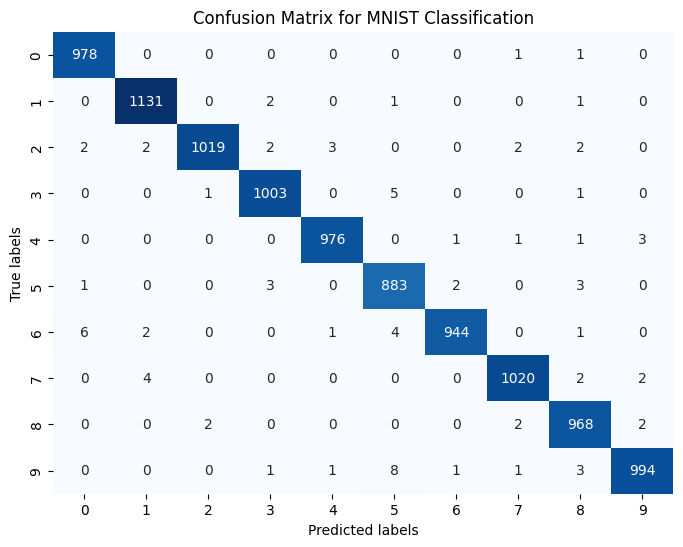

In [24]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Hyperparameter Tuning for Convolutional Neural Networks

* You can use the same strategies learned for tuning regular neural networks
* First, reduce the number of layers

In [25]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2143 - accuracy: 0.9375 - val_loss: 0.0682 - val_accuracy: 0.9825
Epoch 2/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0826 - val_accuracy: 0.9748
Epoch 3/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0507 - val_accuracy: 0.9867
Epoch 4/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 5/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0533 - val_accuracy: 0.9857
313/313 - 0s - loss: 0.0514 - accuracy: 0.9835 - 431ms/epoch - 1ms/step

Test accuracy: 0.9835000038146973


* Remove the post-processing Dense layer

In [26]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 11ms/step - loss: 0.2005 - accuracy: 0.9415 - val_loss: 0.0636 - val_accuracy: 0.9817
Epoch 2/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.0576 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0387 - val_accuracy: 0.9887
313/313 - 1s - loss: 0.0402 - accuracy: 0.9867 - 734ms/epoch - 2ms/step

Test accuracy: 0.9866999983787537


* Have more filters in the convolutional layers

In [27]:
# Build the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 21s 24ms/step - loss: 0.1649 - accuracy: 0.9496 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 2/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 3/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 5/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0479 - val_accuracy: 0.9880
313/313 - 2s - loss: 0.0400 - accuracy: 0.9886 - 2s/epoch - 5ms/step

Test accuracy: 0.9886000156402588


* Add an extra pooling layer

In [43]:
# Build the model
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 10ms/step - loss: 0.2843 - accuracy: 0.9122 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 2/5
844/844 [==============================] - 8s 10ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 4/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0392 - val_accuracy: 0.9885
313/313 - 1s - loss: 0.0491 - accuracy: 0.9869 - 611ms/epoch - 2ms/step

Test accuracy: 0.9868999719619751


* Remove some pooling layers

In [55]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1597 - accuracy: 0.9502 - val_loss: 0.0626 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 3/5
844/844 [==============================] - 19s 22ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0306 - val_accuracy: 0.9918
Epoch 4/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0311 - val_accuracy: 0.9925
313/313 - 2s - loss: 0.0226 - accuracy: 0.9934 - 2s/epoch - 5ms/step

Test accuracy: 0.993399977684021


## A Few Warnings
* Because of the downsampling/dimensionality reduction performed by the convolutional and pooling layers, you can reduce the information passed onto the next layer to nothing (`ValueError`)
* Tips to fix these errors:
    * Reduce the number of layers, especially the number of pooling layers
    * Reduce the pool size (minimum is (2,2))
    * Use the `padding="same"` for the Conv2D layers
* These networks can take a very long time to train, especially with many filters, many layers, or a large amount of data